In [1]:
import matplotlib.pyplot as plt
import pandas as pd

**Task 1.4.1:** Read the CSV file that you created in the last notebook (`"data/mexico-real-estate-clean.csv"`) into a DataFrame named `df`. Be sure to check that all your columns are the correct data type before you go to the next task.

In [2]:
# Import "data/mexico-real-estate-clean.csv"
df = pd.read_csv('../data/processed/mexico-real-estate-clean.csv')

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1159, 6)


,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80
4,house,Yucatán,21.052583,-89.538639,205.0,105191.37


**Task 1.4.2:** Use the [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) method to create a Series named `mean_price_by_state`, where the index contains each state in the dataset and the values correspond to the mean house price for that state. Make sure your Series is sorted from highest to lowest mean price. 

In [3]:
# Declare variable `mean_price_by_state`
mean_price_by_state = df.groupby('state')['price_usd'].mean().sort_values(ascending=False)

# Print object type, shape, and head
print("mean_price_by_state type:", type(mean_price_by_state))
print("mean_price_by_state shape:", mean_price_by_state.shape)
mean_price_by_state.head()

mean_price_by_state type: <class 'pandas.core.series.Series'>
mean_price_by_state shape: (28,)


state
Querétaro           138432.150319
Guanajuato          136279.344161
Distrito Federal    134719.019389
Chihuahua           127443.595934
Quintana Roo        126671.518668
Name: price_usd, dtype: float64

**Task 1.4.3:** Use `mean_price_by_state` to create a bar chart of your results. Make sure the states are sorted from the highest to lowest mean, that you label the x-axis as `"State"` and the y-axis as `"Mean Price [USD]"`, and give the chart the title `"Mean House Price by State"`.

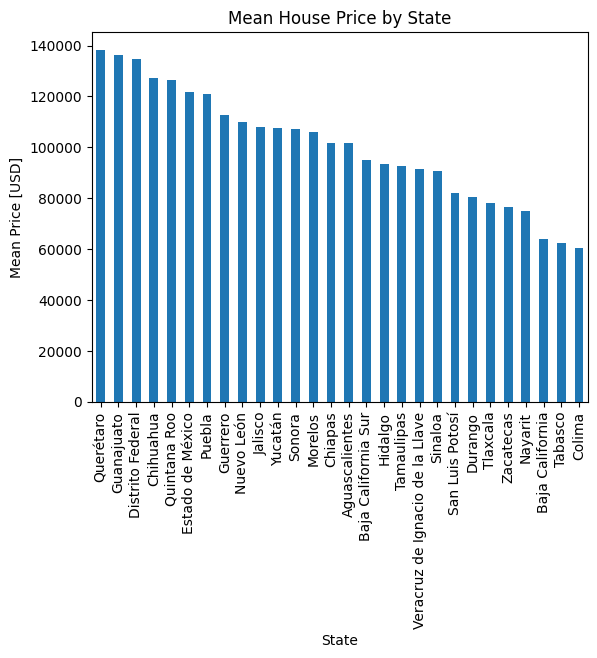

In [4]:
# Create bar chart from `mean_price_by_state` using pandas

mean_price_by_state.plot(
    kind='bar',
    xlabel='State',
    ylabel='Mean Price [USD]',
    title='Mean House Price by State'
);


**Task 1.4.4:** Create a new column in `df` called `"price_per_m2"`. This should be the price for each house divided by it's size. 

In [6]:
# Create "price_per_m2" column
df["price_per_m2"] = df['price_usd'] / df['area_m2']

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1159, 7)


,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80,628.725333
4,house,Yucatán,21.052583,-89.538639,205.0,105191.37,513.128634


**Task 1.4.5:** First, use the [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) method to create a Series where the index contains each state in the dataset and the values correspond to the mean house price per m<sup>2</sup> for that state. Then use the Series to create a bar chart of your results. Make sure the states are sorted from the highest to lowest mean, that you label the x-axis as `"State"` and the y-axis as `"Mean Price per M^2[USD]"`, and give the chart the title `"Mean House Price per M^2 by State"`.

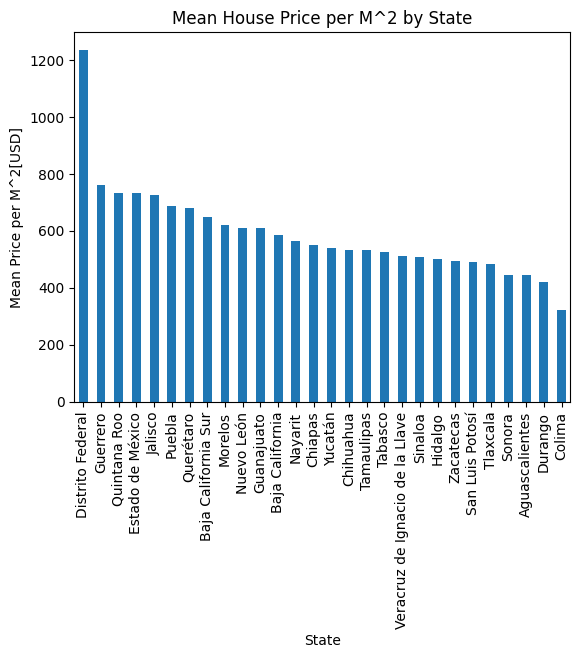

In [7]:
# Group `df` by "state", create bar chart of "price_per_m2"
(
    df
    .groupby('state')
    ['price_per_m2'].mean()
    .sort_values(ascending=False)
    .plot(
        kind='bar',
        xlabel='State',
        ylabel='Mean Price per M^2[USD]',
        title='Mean House Price per M^2 by State'
    )
);

**Task 1.4.6:** Create a scatter plot from `df` that represents price as a function of size. In other words, `"area_m2"` should be on the x-axis, and `"price_usd"` should be on the y-axis. Be sure to use expressive axis labels (`"Area [sq meters]"` and `"Price [USD]"`, respectively).

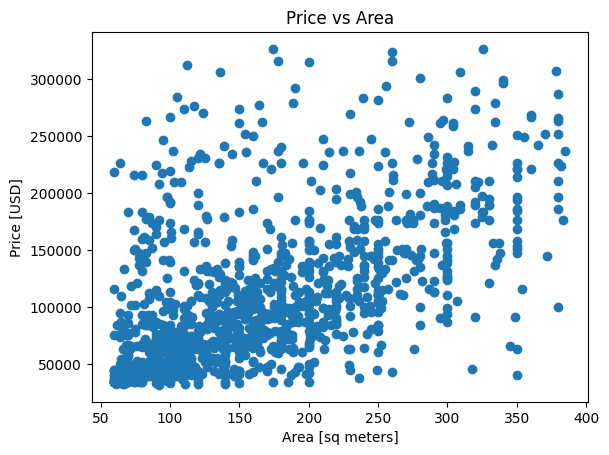

In [8]:
# Create scatter plot of "price_usd" vs "area_m2"
plt.scatter(x=df['area_m2'], y=df['price_usd'])

# Add x-axis label
plt.xlabel('Area [sq meters]')

# Add y-axis label
plt.ylabel('Price [USD]')

# Add title
plt.title('Price vs Area');

**Task 1.4.7:** Using the [`corr`](https://pandas.pydata.org/docs/reference/api/pandas.Series.corr.html) method, calculate the Pearson correlation coefficient for `"area_m2"` and `"price_usd"`.

In [9]:
# Calculate correlation of "price_usd" and "area_m2"
p_correlation = df['area_m2'].corr(df['price_usd'])

# Print correlation coeafficient
print("Correlation of 'area_m2' and 'price_usd' (all Mexico):", p_correlation)

Correlation of 'area_m2' and 'price_usd' (all Mexico): 0.5502363784653355
